In [54]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [55]:
dataset = 'mp' # freesolv / esol / vd / lipo
save_dir = r'..\results_figure'

In [ ]:
if dataset == 'freesolv':
    MSE_k = 0
    MAE_k = 0
    s = 15
elif dataset == 'esol':
    MSE_k = 2
    MAE_k = 2
    s = 15
elif dataset == 'vd':
    MSE_k = 2
    MAE_k = 2
    s = 25
elif dataset == 'lipo':
    MSE_k = 2
    MAE_k = 2
    s = 15
elif dataset == 'mp':
    MSE_k = 1 # egcn은 3
    MAE_k = 0
    s = 15

print(MSE_k, MAE_k)

1 0


# MSE & MSE for train dataset

In [57]:
# MSE
df_val_MSE = pd.read_csv(r'..\results_datasets\mp\result_val_' + dataset + f'_mse_{MSE_k}'  + '.csv')
print(df_val_MSE.shape[1])

# MAE
df_val_MAE = pd.read_csv(r'..\results_datasets\mp\result_val_' + dataset + f'_mae_{MAE_k}' + '.csv')
print(df_val_MAE.shape[1])

4
4


In [58]:
# MSE 컬럼명 추가
columns = ['target', 'fitted'] + [f'feature{i}' for i in range(1, df_val_MSE.shape[1]-1)]
df_val_MSE.columns = columns

# MAE 컬럼명 추가
columns = ['target', 'fitted'] + [f'feature{i}' for i in range(1, df_val_MAE.shape[1]-1)]
df_val_MAE.columns = columns

In [59]:
# R^2
r2_mse = r2_score(df_val_MSE['target'], df_val_MSE['fitted'])
r2_mae = r2_score(df_val_MAE['target'], df_val_MAE['fitted'])

print(r2_mse)
# print(r2_mae)

0.26771184747031984


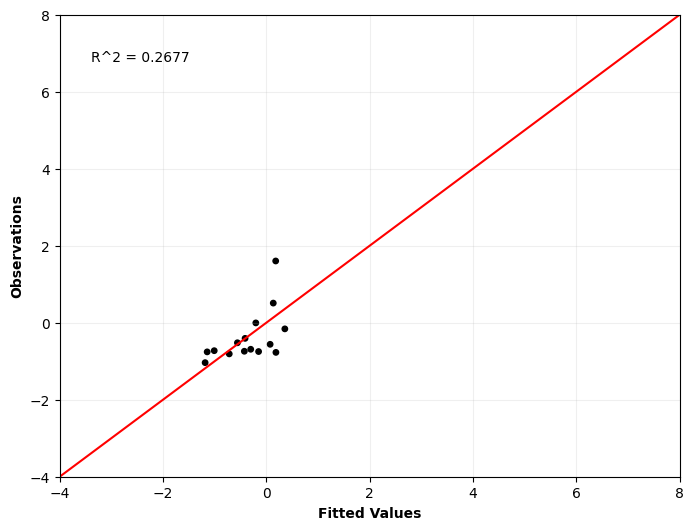

In [60]:
if dataset in ['freesolv', 'esol', 'lipo']:
    s = 25
elif dataset in ['vd']:
    s = 15

from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_val_MSE['fitted'], df_val_MSE['target'],
                      c=df_val_MSE['target'], s = s,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_val_MSE['target'].min(), df_val_MSE['fitted'].min()) - 20
max_val = max(df_val_MSE['target'].max(), df_val_MSE['fitted'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

if dataset == 'freesolv':
    plt.xlim(-15, 6)
    plt.ylim(-15, 6)
    plt.xticks(range(-15, 9, 3))
    plt.yticks(range(-15, 9, 3))
elif dataset == 'esol':
    plt.xlim(-10, 4)
    plt.ylim(-10, 4)
    plt.xticks(range(-10, 6, 2))
    plt.yticks(range(-10, 6, 2))
elif dataset == 'vd':
    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.xticks(range(0, 9, 1))
    plt.yticks(range(0, 9, 1))
elif dataset == 'lipo':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))
elif dataset == 'mp':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))

plt.xlabel("Fitted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')

plt.text(0.05, 0.90, f'R^2 = {r2_mse:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)

plt.grid(alpha = 0.2)

# # 저장
# file_name = f'scatter_fitted_mse_{dataset}.png'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi = 300, bbox_inches = 'tight')

plt.show()

# MAE

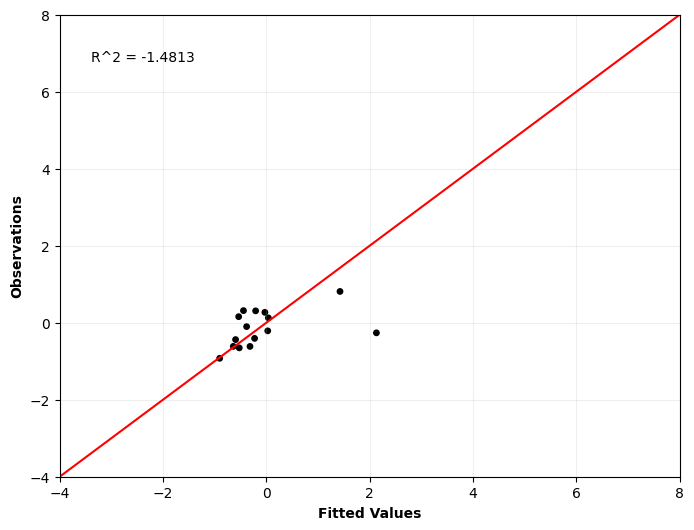

In [61]:
from matplotlib.colors import ListedColormap
pastel_cmap = ListedColormap(["black"])

plt.figure(figsize = (8, 6))

scatter = plt.scatter(df_val_MAE['fitted'], df_val_MAE['target'],
                      c=df_val_MAE['target'], s = s,
                      cmap = pastel_cmap)

# 대각선 추가
min_val = min(df_val_MAE['target'].min(), df_val_MAE['fitted'].min()) - 20
max_val = max(df_val_MAE['target'].max(), df_val_MAE['fitted'].max()) + 20
plt.plot([min_val, max_val], [min_val, max_val], color='red')

if dataset == 'freesolv':
    plt.xlim(-15, 6)
    plt.ylim(-15, 6)
    plt.xticks(range(-15, 9, 3))
    plt.yticks(range(-15, 9, 3))
elif dataset == 'esol':
    plt.xlim(-10, 4)
    plt.ylim(-10, 4)
    plt.xticks(range(-10, 6, 2))
    plt.yticks(range(-10, 6, 2))
elif dataset == 'vd':
    plt.xlim(0, 8)
    plt.ylim(0, 8)
    plt.xticks(range(0, 9, 1))
    plt.yticks(range(0, 9, 1))
elif dataset == 'lipo':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))
elif dataset == 'mp':
    plt.xlim(-4, 8)
    plt.ylim(-4, 8)
    plt.xticks(range(-4, 10, 2))
    plt.yticks(range(-4, 10, 2))  
plt.xlabel("Fitted Values", fontweight = 'bold')
plt.ylabel("Observations", fontweight = 'bold')

plt.text(0.05, 0.90, f'R^2 = {r2_mae:.4f}',
         transform = plt.gca().transAxes,
         fontsize = 10,)

plt.grid(alpha = 0.2)

# # 저장
# file_name = f'scatter_fitted_mae_{dataset}.png'
# file_path = os.path.join(save_dir, file_name)
# print(file_path)
# plt.savefig(file_path, dpi = 300, bbox_inches = 'tight')

plt.show()